In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#from google.colab import drive
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
df = pd.read_csv(url)
housingInfo = pd.DataFrame(df)
housingInfo.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
def errorFunction(inputMatrix, outputMatrix, theta):
  currentPrediction = np.dot(inputMatrix, theta)
  error = np.subtract(currentPrediction, outputMatrix)
  squareError = np.square(error)
  meanSquareError = 1/(2*sizePrice) * np.sum(squareError)
  return meanSquareError

In [3]:
def gradientDescent(inputMatrix, outputMatrix, theta, alpha, iterations):
  costHistory = np.zeros(iterations)

  # Converting inputMatrix to float64 to ensure numerical operations
  inputMatrix = inputMatrix.astype(np.float64)

  for i in range(iterations):
    currentPrediction = inputMatrix.dot(theta)
    error = np.subtract(currentPrediction, outputMatrix)
    sumDelta = (alpha/sizePrice) * inputMatrix.transpose().dot(error)
    theta = theta - sumDelta
    costHistory[i] = errorFunction(inputMatrix, outputMatrix, theta)
  return theta, costHistory

In [4]:
def Normalization(inputMatrix):
    #Separating the first column (doesn't change)
    first_column = inputMatrix[:, 0].reshape(-1, 1)

    #Applying normalization to the remaining columns
    scaler = MinMaxScaler()
    remaining_columns = inputMatrix[:, 1:]
    normalized_columns = scaler.fit_transform(remaining_columns)

    #Concatenating the first column with the normalized columns
    normalizedMatrix = np.hstack((first_column, normalized_columns))

    return normalizedMatrix

In [5]:
def Standardization(inputMatrix):
    #Separating the first column (doesn't change)
    first_column = inputMatrix[:, 0].reshape(-1, 1)

    #Applying standardization to the remaining columns
    scaler = StandardScaler()
    remaining_columns = inputMatrix[:, 1:]
    standardized_columns = scaler.fit_transform(remaining_columns)

    #Concatenating the first column with the standardized columns
    standardizedMatrix = np.hstack((first_column, standardized_columns))

    return standardizedMatrix

In [6]:
#changing string values to appropriate numeric values
binaryColumns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
def binaryMap(x):
  return x.map({'yes': 1, 'no': 0})

housingInfo['furnishingstatus'] = housingInfo['furnishingstatus'].replace({
    'furnished': 3,
    'semi-furnished': 2,
    'unfurnished': 1
})

housingInfo[binaryColumns] = housingInfo[binaryColumns].apply(binaryMap)
housingInfo.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3


In [7]:
#separating the dataset into appropriate columns
price = housingInfo.values[:,0]
area = housingInfo.values[:,1]
bedrooms = housingInfo.values[:,2]
bathrooms = housingInfo.values[:,3]
stories = housingInfo.values[:,4]
mainroad = housingInfo.values[:,5]
guestroom = housingInfo.values[:,6]
basement = housingInfo.values[:,7]
hotwaterheating = housingInfo.values[:,8]
airconditioning = housingInfo.values[:,9]
parking = housingInfo.values[:,10]
prefarea = housingInfo.values[:,11]
furnishingstatus = housingInfo.values[:,12]

#setting the lengths of each column
sizePrice = len(price)
sizeArea = len(area)
sizeBedrooms = len(bedrooms)
sizeBathrooms = len(bathrooms)
sizeStories = len(stories)
sizeMainroad = len(mainroad)
sizeGuestroom = len(guestroom)
sizeBasement = len(basement)
sizeHotwaterheating = len(hotwaterheating)
sizeAirconditioning = len(airconditioning)
sizeParking = len(parking)
sizePrefarea = len(prefarea)
sizeFurnishingstatus = len(furnishingstatus)

In [8]:
#splitting the data into training and validation sets, setting sizes
priceTrain, priceVal = train_test_split(price, train_size = 0.8, test_size=0.2, random_state=125)
sizePriceTrain = len(priceTrain)
sizePriceVal = len(priceVal)
areaTrain, areaVal = train_test_split(area, train_size = 0.8, test_size=0.2, random_state=125)
sizeAreaTrain = len(areaTrain)
sizeAreaVal = len(areaVal)
bedroomsTrain, bedroomsVal = train_test_split(bedrooms, train_size = 0.8, test_size=0.2, random_state=125)
sizeBedroomsTrain = len(bedroomsTrain)
sizeBedroomsVal = len(bedroomsVal)
bathroomsTrain, bathroomsVal = train_test_split(bathrooms, train_size = 0.8, test_size=0.2, random_state=125)
sizeBathroomsTrain = len(bathroomsTrain)
sizeBathroomsVal = len(bathroomsVal)
storiesTrain, storiesVal = train_test_split(stories, train_size = 0.8, test_size=0.2, random_state=125)
sizeStoriesTrain = len(storiesTrain)
sizeStoriesVal = len(storiesVal)
mainroadTrain, mainroadVal = train_test_split(mainroad, train_size = 0.8, test_size=0.2, random_state=125)
sizeMainroadTrain = len(mainroadTrain)
sizeMainroadVal = len(mainroadVal)
guestTrain, guestVal = train_test_split(guestroom, train_size = 0.8, test_size=0.2, random_state=125)
sizeGuestTrain = len(guestTrain)
sizeGuestVal = len(guestVal)
basementTrain, basementVal = train_test_split(basement, train_size = 0.8, test_size=0.2, random_state=125)
sizeBasementTrain = len(basementTrain)
sizeBasementVal = len(basementVal)
hotwaterheatingTrain, hotwaterheatingVal = train_test_split(hotwaterheating, train_size = 0.8, test_size=0.2, random_state=125)
sizeHotwaterheatingTrain = len(hotwaterheatingTrain)
sizeHotwaterheatingVal = len(hotwaterheatingVal)
airconditioningTrain, airconditioningVal = train_test_split(airconditioning, train_size = 0.8, test_size=0.2, random_state=125)
sizeAirconditioningTrain = len(airconditioningTrain)
sizeAirconditioningVal = len(airconditioningVal)
parkingTrain, parkingVal = train_test_split(parking, train_size = 0.8, test_size=0.2, random_state=125)
sizeParkingTrain = len(parkingTrain)
sizeParkingVal = len(parkingVal)
prefareaTrain, prefareaVal = train_test_split(prefarea, train_size = 0.8, test_size=0.2, random_state=125)
sizePrefareaTrain = len(prefareaTrain)
sizePrefareaVal = len(prefareaVal)
furnishingstatusTrain, furnishingstatusVal = train_test_split(furnishingstatus, train_size = 0.8, test_size=0.2, random_state=125)
sizeFurnishingstatusTrain = len(furnishingstatusTrain)
sizeFurnishingstatusVal = len(furnishingstatusVal)

In [9]:
#Making matricies for each of the training sets to fill with ones
priceOnesTrain = np.ones((sizePriceTrain, 1))
areaOnesTrain = np.ones((sizeAreaTrain, 1))
bedroomsOnesTrain = np.ones((sizeBedroomsTrain, 1))
bathroomsOnesTrain = np.ones((sizeBathroomsTrain, 1))
storiesOnesTrain = np.ones((sizeStoriesTrain, 1))
mainroadOnesTrain = np.ones((sizeMainroadTrain, 1))
guestroomOnesTrain = np.ones((sizeGuestTrain, 1))
basementOnesTrain = np.ones((sizeBasementTrain, 1))
hotwaterheatingOnesTrain = np.ones((sizeHotwaterheatingTrain, 1))
airconditioningOnesTrain = np.ones((sizeAirconditioningTrain, 1))
parkingOnesTrain = np.ones((sizeParkingTrain, 1))
prefareaOnesTrain = np.ones((sizePrefareaTrain, 1))
furnishingstatusOnesTrain = np.ones((sizeFurnishingstatusTrain, 1))

#Making matricies for each of the validation sets to fill with ones
priceOnesVal = np.ones((sizePriceVal, 1))
areaOnesVal = np.ones((sizeAreaVal, 1))
bedroomsOnesVal = np.ones((sizeBedroomsVal, 1))
bathroomsOnesVal = np.ones((sizeBathroomsVal, 1))
storiesOnesVal = np.ones((sizeStoriesVal, 1))
mainroadOnesVal = np.ones((sizeMainroadVal, 1))
guestroomOnesVal = np.ones((sizeGuestVal, 1))
basementOnesVal = np.ones((sizeBasementVal, 1))
hotwaterheatingOnesVal = np.ones((sizeHotwaterheatingVal, 1))
airconditioningOnesVal = np.ones((sizeAirconditioningVal, 1))
parkingOnesVal = np.ones((sizeParkingVal, 1))
prefareaOnesVal = np.ones((sizePrefareaVal, 1))
furnishingstatusOnesVal = np.ones((sizeFurnishingstatusVal, 1))

#Making the training matricies
priceTrain = priceTrain.reshape(sizePriceTrain,1)
areaTrain = areaTrain.reshape(sizeAreaTrain,1)
bedroomsTrain = bedroomsTrain.reshape(sizeBedroomsTrain,1)
bathroomsTrain = bathroomsTrain.reshape(sizeBathroomsTrain,1)
storiesTrain = storiesTrain.reshape(sizeStoriesTrain,1)
mainroadTrain = mainroadTrain.reshape(sizeMainroadTrain,1)
guestroomTrain = guestTrain.reshape(sizeGuestTrain,1)
basementTrain = basementTrain.reshape(sizeBasementTrain,1)
hotwaterheatingTrain = hotwaterheatingTrain.reshape(sizeHotwaterheatingTrain,1)
airconditioningTrain = airconditioningTrain.reshape(sizeAirconditioningTrain,1)
parkingTrain = parkingTrain.reshape(sizeParkingTrain,1)
prefareaTrain = prefareaTrain.reshape(sizePrefareaTrain,1)
furnishingstatusTrain = furnishingstatusTrain.reshape(sizeFurnishingstatusTrain,1)

#Making the validation matricies
priceVal = priceVal.reshape(sizePriceVal,1)
areaVal = areaVal.reshape(sizeAreaVal,1)
bedroomsVal = bedroomsVal.reshape(sizeBedroomsVal,1)
bathroomsVal = bathroomsVal.reshape(sizeBathroomsVal,1)
storiesVal = storiesVal.reshape(sizeStoriesVal,1)
mainroadVal = mainroadVal.reshape(sizeMainroadVal,1)
guestroomVal = guestVal.reshape(sizeGuestVal,1)
basementVal = basementVal.reshape(sizeBasementVal,1)
hotwaterheatingVal = hotwaterheatingVal.reshape(sizeHotwaterheatingVal,1)
airconditioningVal = airconditioningVal.reshape(sizeAirconditioningVal,1)
parkingVal = parkingVal.reshape(sizeParkingVal,1)
prefareaVal = prefareaVal.reshape(sizePrefareaVal,1)
furnishingstatusVal = furnishingstatusVal.reshape(sizeFurnishingstatusVal,1)

#Combining all necessary matricies for the regression
oneTrainPartA = np.hstack((priceOnesTrain, areaTrain, bedroomsTrain, bathroomsTrain, storiesTrain, parkingTrain))
oneValPartA = np.hstack((priceOnesVal, areaVal, bedroomsVal, bathroomsVal, storiesVal, parkingVal))
oneTrainPartB = np.hstack((priceOnesTrain, areaTrain, bedroomsTrain, bathroomsTrain, storiesTrain, mainroadTrain, guestroomTrain, basementTrain, hotwaterheatingTrain, airconditioningTrain, parkingTrain, prefareaTrain, furnishingstatusTrain))
oneValPartB = np.hstack((priceOnesVal, areaVal, bedroomsVal, bathroomsVal, storiesVal, mainroadVal, guestroomVal, basementVal, hotwaterheatingVal, airconditioningVal, parkingVal, prefareaVal, furnishingstatusVal))


oneAThetaTrain = np.zeros(6)
oneAThetaVal = np.zeros(6)
oneBThetaTrain = np.zeros(13)
oneBThetaVal = np.zeros(13)

In [10]:
#Standardizing the data
stdTrainA = Standardization(oneTrainPartA)
stdValA = Standardization(oneValPartA)
stdTrainB = Standardization(oneTrainPartB)
stdValB = Standardization(oneValPartB)

#Normalizing the data
normTrainA = Normalization(oneTrainPartA)
normValA = Normalization(oneValPartA)
normTrainB = Normalization(oneTrainPartB)
normValB = Normalization(oneValPartB)

For this part of the homework, I will be using the Error Function and Gradient Descent Function that was created in the previous homework. This will later be changed to accomodate parameter penalties.

In [17]:
#-----CHANGE VARIABLES HERE-----
oneAThetaTrain = [0., 0., 0., 0., 0., 0.]
oneAThetaVal = [0., 0., 0., 0., 0., 0.]

oneBThetaTrain = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
oneBThetaVal = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

twoAThetaTrainStd = [0., 0., 0., 0., 0., 0.]
twoAThetaValStd = [0., 0., 0., 0., 0., 0.]
twoAThetaTrainNorm = [0., 0., 0., 0., 0., 0.]
twoAThetaValNorm = [0., 0., 0., 0., 0., 0.]

twoBThetaTrainStd = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
twoBThetaValStd = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
twoBThetaTrainNorm = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
twoBThetaValNorm = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

threeAThetaTrainStd = [0., 0., 0., 0., 0., 0.]
threeAThetaValStd = [0., 0., 0., 0., 0., 0.]
threeAThetaTrainNorm = [0., 0., 0., 0., 0., 0.]
threeAThetaValNorm = [0., 0., 0., 0., 0., 0.]

threeBThetaTrainStd = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
threeBThetaValStd = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
threeBThetaTrainNorm = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
threeBThetaValNorm = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

alpha = 0.0001
iterations = 30
#--------------------------------

Final value of training theta = [[-1.01295125e+101]
 [-6.11906440e+104]
 [-3.03999118e+101]
 [-1.32774403e+101]
 [-1.85472435e+101]
 [-8.50829543e+100]]
Final value of validation theta = [[-1.84523324e+83]
 [-1.13520115e+87]
 [-5.63994250e+83]
 [-2.56918148e+83]
 [-3.42572331e+83]
 [-1.38071516e+83]]


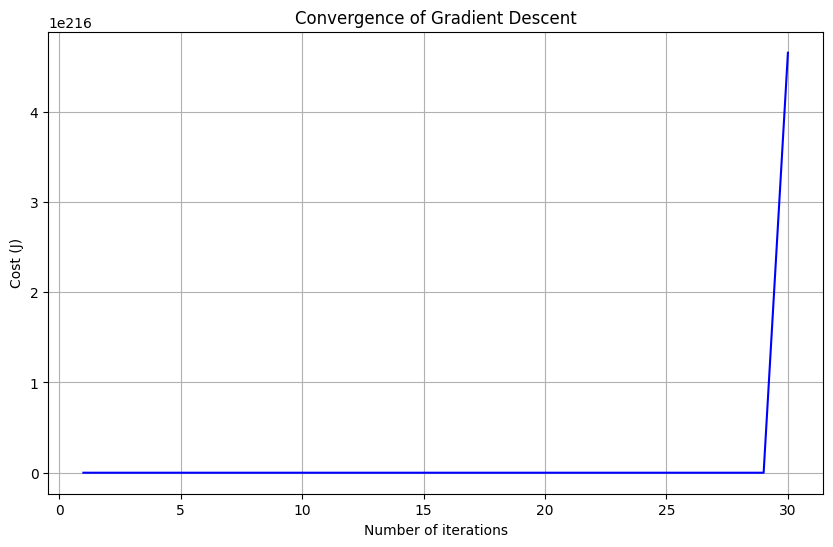

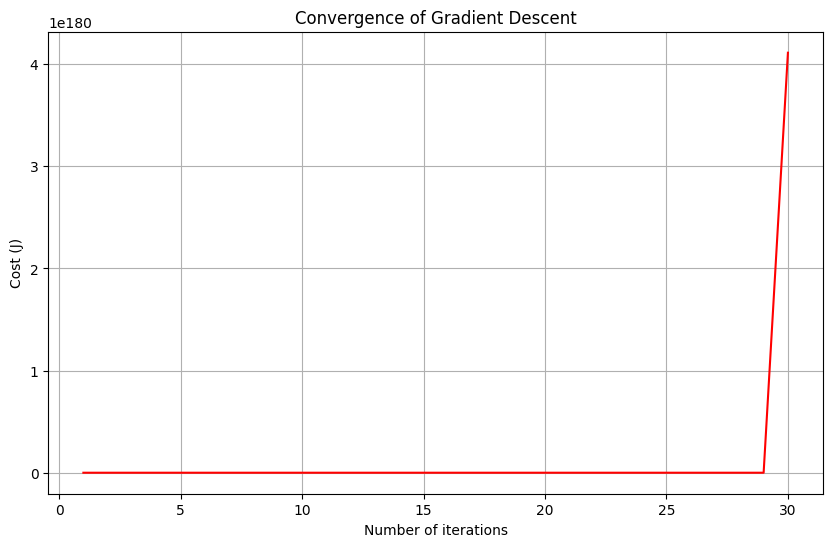

In [18]:
oneAThetaTrain = np.array(oneAThetaTrain).reshape(6,1)
oneAThetaVal = np.array(oneAThetaVal).reshape(6,1)

oneAThetaTrain, costHistoryTrain1A = gradientDescent(oneTrainPartA, priceTrain, oneAThetaTrain, alpha, iterations)
oneAThetaVal, costHistoryVal1A = gradientDescent(oneValPartA, priceVal, oneAThetaVal, alpha, iterations)
print('Final value of training theta =', oneAThetaTrain)
print('Final value of validation theta =', oneAThetaVal)

#Plotting the training set
plt.figure()
plt.plot(range(1, iterations + 1), costHistoryTrain1A, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

#Plotting the validation set
plt.figure()
plt.plot(range(1, iterations + 1), costHistoryVal1A, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

# Show the plot
plt.show()

In this first problem, the goal is to predict housing prices based on five different characteristics: the area that it is located in, the number of bedrooms, the number of bathrooms, the number of stories, and whether or not there is parking available. The resulting graph, seen above, shows that the cost stays low for the first few iterations but then suddenly shoots up to astronomically large values (e.g. -5.8e+134). This does not seem to be right at all, but I would almost say that is to be expected because the data has been neither normalized or standardized.

Final value of training theta = [[-1.01295541e+101]
 [-6.11908940e+104]
 [-3.04000365e+101]
 [-1.32774947e+101]
 [-1.85473196e+101]
 [-9.10369598e+100]
 [-1.81712236e+100]
 [-3.50925929e+100]
 [-4.17758574e+099]
 [-3.54788135e+100]
 [-8.50833023e+100]
 [-2.70865882e+100]
 [-2.01715702e+101]]
Final value of validation theta = [[-1.84524064e+83]
 [-1.13520568e+87]
 [-5.63996514e+83]
 [-2.56919179e+83]
 [-3.42573706e+83]
 [-1.67985371e+83]
 [-5.25076237e+82]
 [-7.63342919e+82]
 [-1.11070549e+82]
 [-7.27417080e+82]
 [-1.38072069e+83]
 [-5.79138001e+82]
 [-3.61787897e+83]]


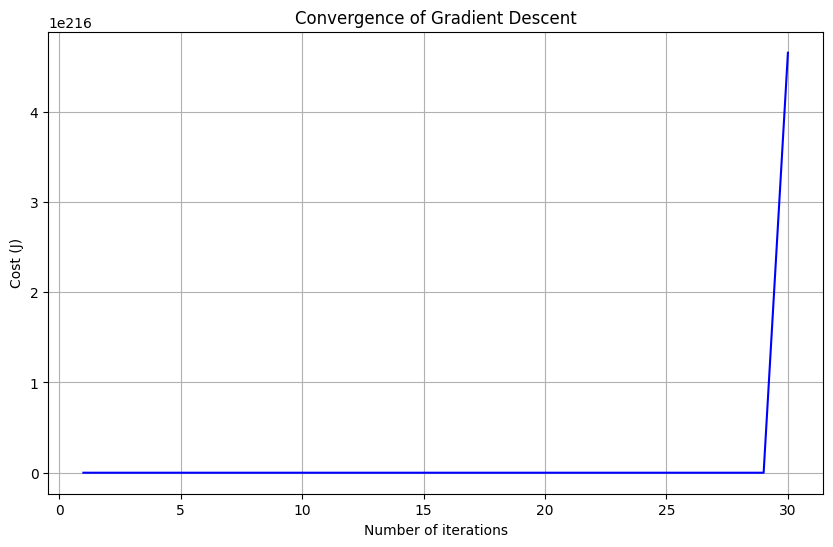

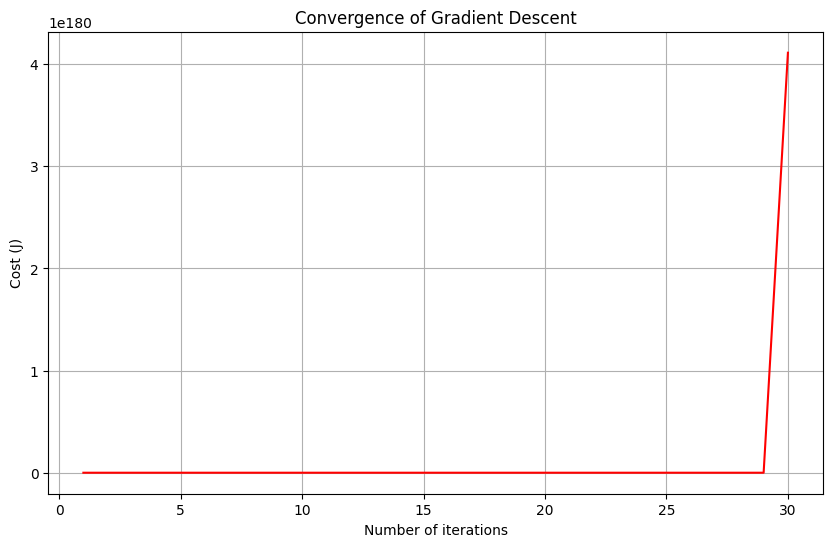

In [20]:
oneBThetaTrain = np.array(oneBThetaTrain).reshape(13,1)
oneBThetaVal = np.array(oneBThetaVal).reshape(13,1)

oneBThetaTrain, costHistoryTrain1B = gradientDescent(oneTrainPartB, priceTrain, oneBThetaTrain, alpha, iterations)
oneBThetaVal, costHistoryVal1B = gradientDescent(oneValPartB, priceVal, oneBThetaVal, alpha, iterations)
print('Final value of training theta =', oneBThetaTrain)
print('Final value of validation theta =', oneBThetaVal)

#plotting the training set
plt.figure()
plt.plot(range(1, iterations + 1), costHistoryTrain1B, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

plt.figure()
plt.plot(range(1, iterations + 1), costHistoryVal1B, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

# Show the plot
plt.show()

Despite adding in the remaining columns to this Machine Learning model, the cost function still does not converge. The values of theta are incredibly large in this model like they were in the frist part of this problem.

Final value of training theta = [[-1.01295125e+101]
 [-6.11906440e+104]
 [-3.03999118e+101]
 [-1.32774403e+101]
 [-1.85472435e+101]
 [-8.50829543e+100]]
Final value of validation theta = [[-1.84523324e+83]
 [-1.13520115e+87]
 [-5.63994250e+83]
 [-2.56918148e+83]
 [-3.42572331e+83]
 [-1.38071516e+83]]


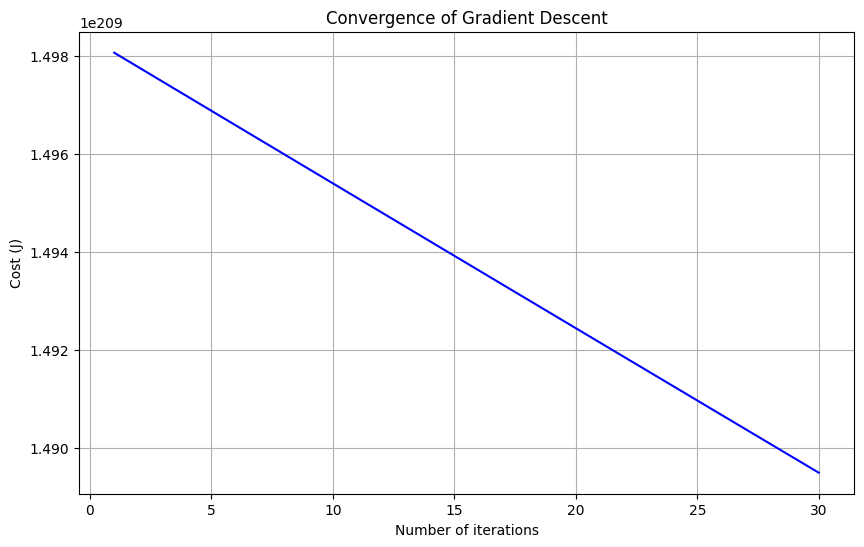

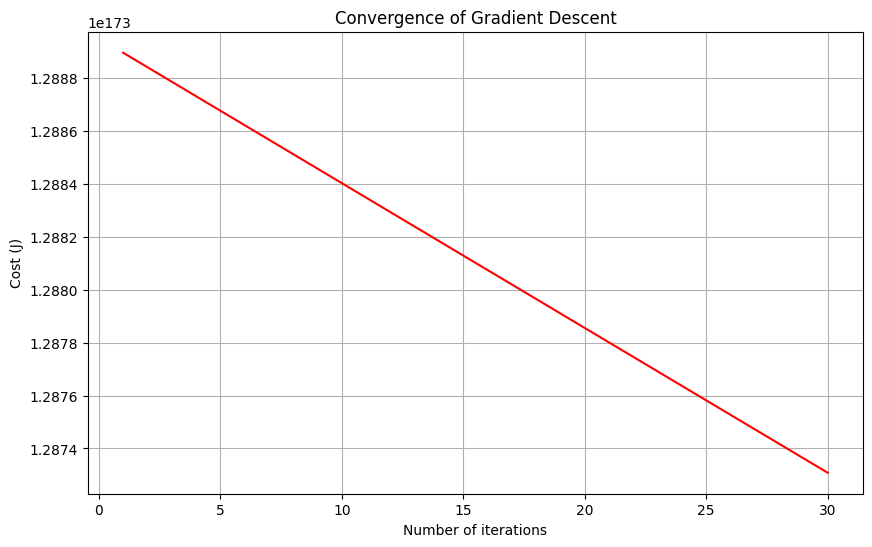

In [21]:
twoAThetaTrainStd = np.array(twoAThetaTrainStd).reshape(6,1)
twoAThetaValStd = np.array(twoAThetaValStd).reshape(6,1)

twoAThetaTrainStd, costHistoryTrain1A = gradientDescent(stdTrainA, priceTrain, twoAThetaTrain, alpha, iterations)
twoAThetaValStd, costHistoryVal1A = gradientDescent(stdValA, priceVal, twoAThetaValStdAThetaVal, alpha, iterations)
print('Final value of training theta =', oneAThetaTrain)
print('Final value of validation theta =', oneAThetaVal)

#Plotting the training set
plt.figure()
plt.plot(range(1, iterations + 1), costHistoryTrain1A, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

#Plotting the validation set
plt.figure()
plt.plot(range(1, iterations + 1), costHistoryVal1A, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')

# Show the plot
plt.show()

The process for the second problem is very similar to that of the first. The main difference is that now the data will be normalized and standardized in two separate tests. This test will show what happens to the model when the data is standardized linearly.